In [45]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from datetime import date, time, datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx")
df_copy = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx")

In [48]:
df = df.rename(columns={"No-show":"NoShow"})

In [49]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [50]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  NoShow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [52]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# **A. Feature Engineering**

**Check for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value**

In [53]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  NoShow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
NoShow            0
dtype: int64

**Determine the frequency of distinct values in each feature set**

In [54]:
# Numerical features
numerical_features = ["PatientId","AppointmentID","ScheduledDay","AppointmentDay","Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
# Categorical features
categorical_features = ["Gender","Neighbourhood","NoShow"]

# Printing frequency of distinct values in each feature set for numerical_features
#print( df['PatientId'].value_counts() )
#print( df['AppointmentID'].value_counts() )
#print( df['ScheduledDay'].value_counts() )
#print( df['AppointmentDay'].value_counts() )
#print( df['Age'].value_counts() )
#print( df['Scholarship'].value_counts() )
#print( df['Hipertension'].value_counts() )
#print( df['Diabetes'].value_counts() )
#print( df['Alcoholism'].value_counts() )
#print( df['Handcap'].value_counts() )
#print( df['SMS_received'].value_counts() )

for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Printing unique values in each categorical features
for a in categorical_features:
    print("------------------categorical_feature----------------------"+a+": ")
    #print(sorted(df[a].unique()))
    print(df[a].value_counts())

------------------numerical_feature----------------------PatientId: 
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64
------------------numerical_feature----------------------AppointmentID: 
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64
------------------numerical_feature----------------------ScheduledDay: 
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103549, dtype:

**functions to plot all features within the dataset to visualize for outliers**

Text(0.5, 0, 'SMS_received ')

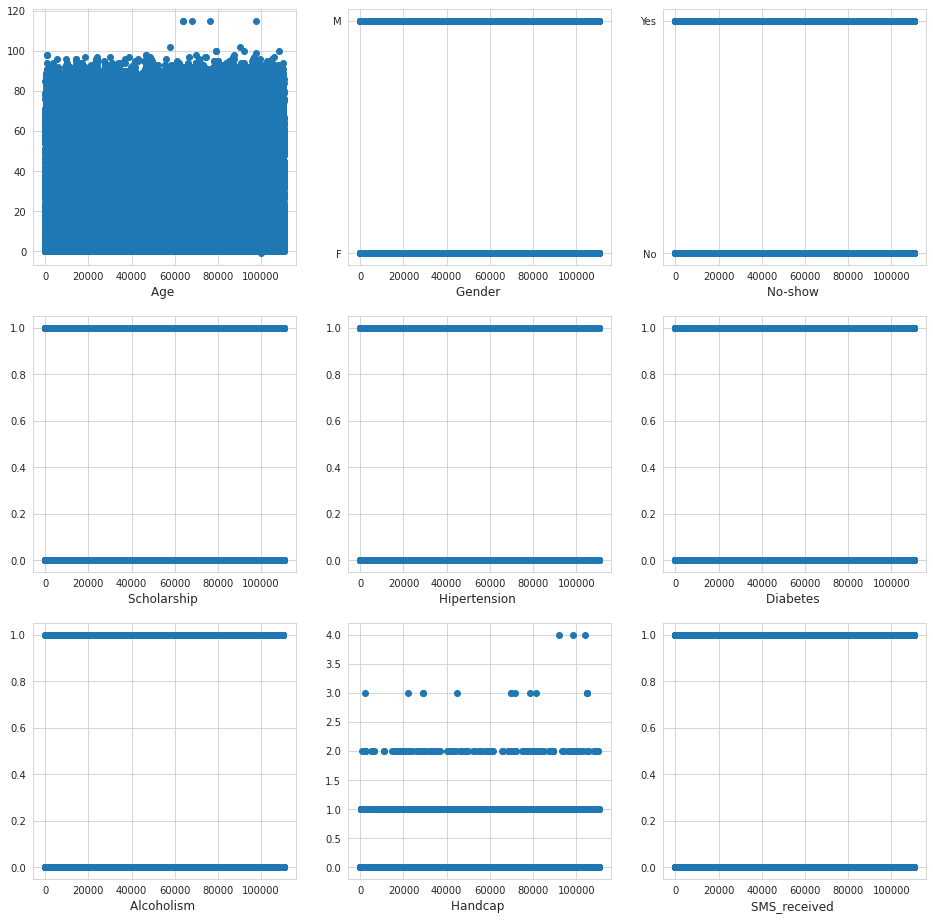

In [56]:
plt.rcParams['figure.figsize'] = (16, 16)
plt.subplot(3, 3, 1)
y=df['Age']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Age ', fontsize = 12)

plt.subplot(3, 3, 2)
y=df['Gender']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Gender ', fontsize = 12)

plt.subplot(3, 3, 3)
y=df['NoShow']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('No-show ', fontsize = 12)

plt.subplot(3, 3, 4)
y=df['Scholarship']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Scholarship ', fontsize = 12)

plt.subplot(3, 3, 5)
y=df['Hipertension']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Hipertension ', fontsize = 12)

plt.subplot(3, 3, 6)
y=df['Diabetes']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Diabetes ', fontsize = 12)

plt.subplot(3, 3, 7)
y=df['Alcoholism']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Alcoholism ', fontsize = 12)

plt.subplot(3, 3, 8)
y=df['Handcap']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Handcap ', fontsize = 12)

plt.subplot(3, 3, 9)
y=df['SMS_received']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('SMS_received ', fontsize = 12)

Text(0.5, 0, 'Neighbourhood ')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


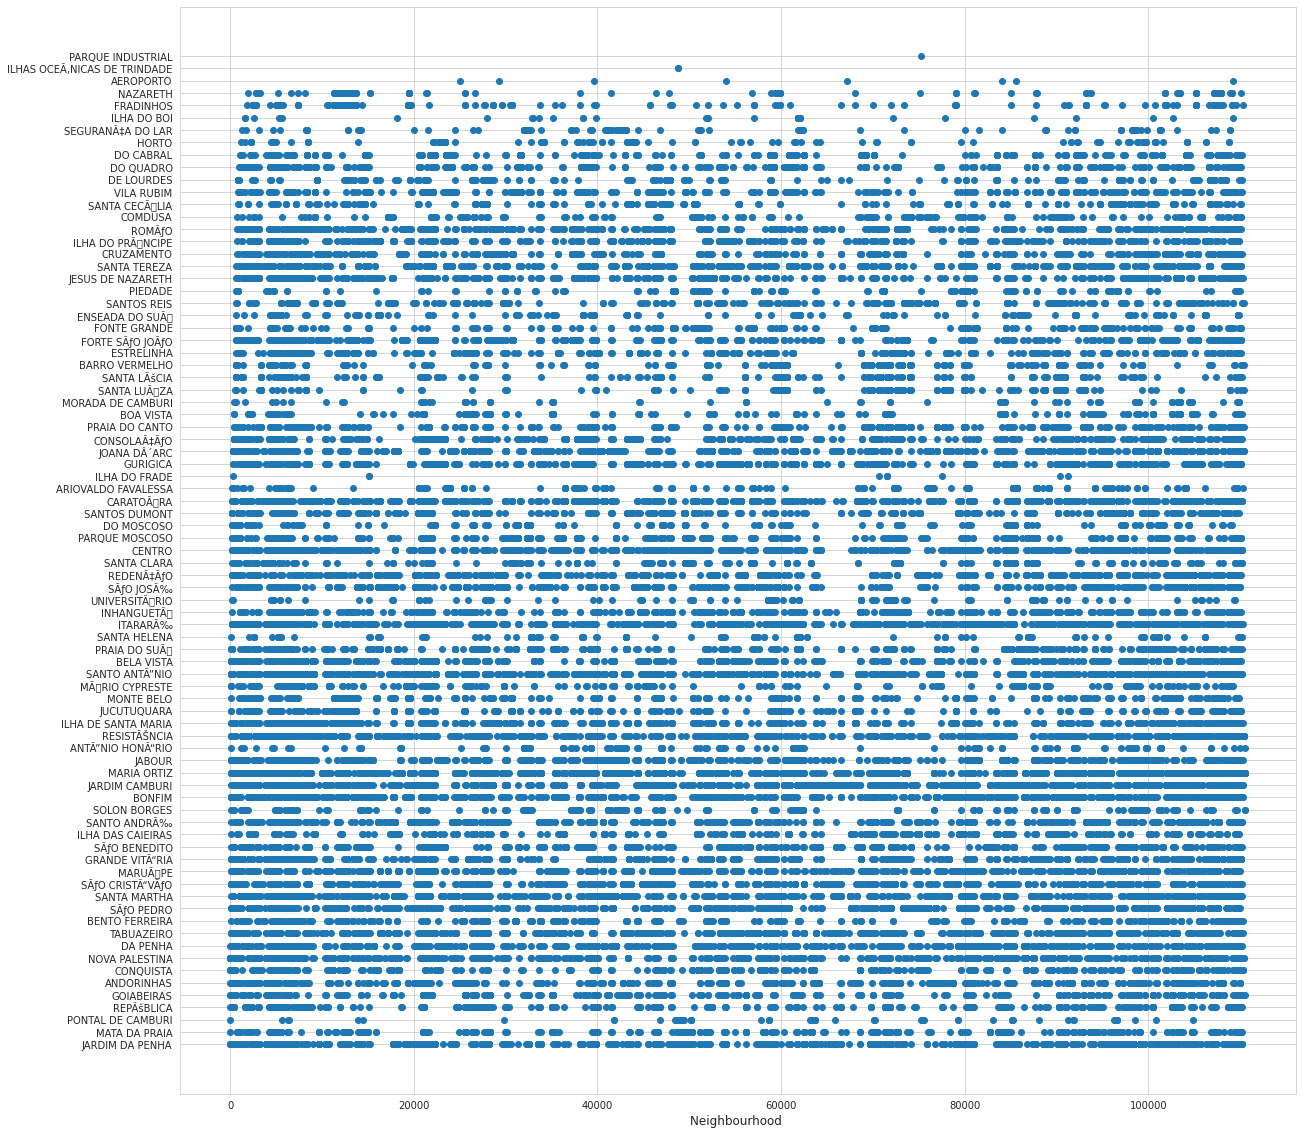

In [57]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(1, 1, 1)
y=df['Neighbourhood']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Neighbourhood ', fontsize = 12)

**Count the frequency of negative Age feature observations, and remove them**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  NoShow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [59]:
print("Before removing the negative age")
print( df['Age'].value_counts() )
# Get names of indexes for which column Age has value less than 0
a = df.index[df['Age'] < 0]
print (a)
df = df.drop(index=a)
print("After removing the negative age")
print( df['Age'].value_counts() )

Before removing the negative age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64
Int64Index([99832], dtype='int64')
After removing the negative age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


In [60]:
#checking for 0 values. We see that Age has 3539 0s
print(df[df['Age']==0].shape[0])
print(df[df['Scholarship']==0].shape[0])
print(df[df['Hipertension']==0].shape[0])
print(df[df['Diabetes']==0].shape[0])
print(df[df['Alcoholism']==0].shape[0])
print(df[df['Handcap']==0].shape[0])
print(df[df['SMS_received']==0].shape[0])

3539
99665
88725
102583
107166
108285
75044


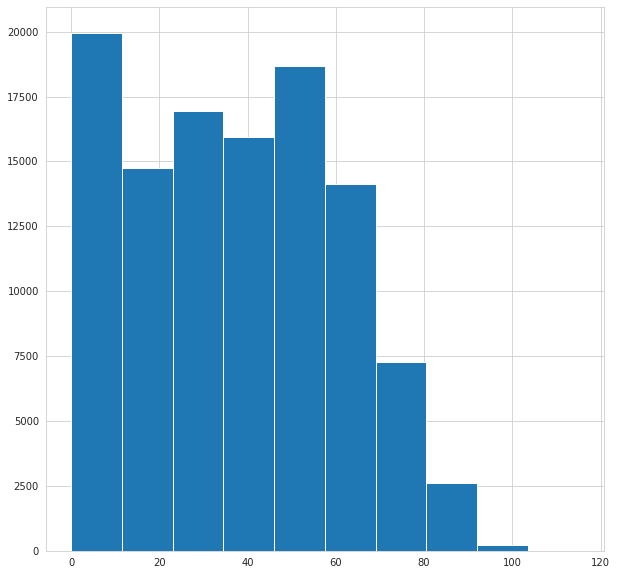

In [61]:
# Check the distribution of Age. skewed distributions hence median is a better choice as it is less affected by outliers
df.Age.hist(bins=10,figsize=(10,10))
plt.show()

In [62]:
# replacing 0 values with median of the Age column
df['Age']=df['Age'].replace(0,df['Age'].median())#skewed distribution

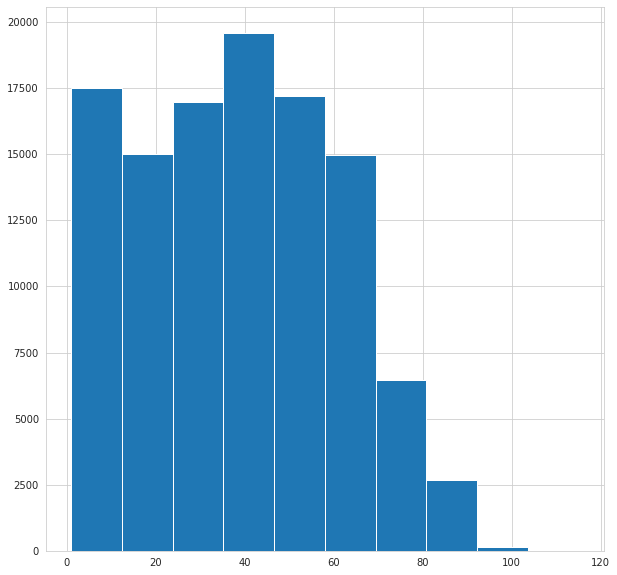

In [63]:
df.Age.hist(bins=10,figsize=(10,10))
plt.show()

In [64]:
#checking for 0 values. We see that Age has 3539 0s
print(df[df['Age']==0].shape[0]) # Now, there is no age of 0 as we replaced it with the median in previous step
print(df[df['Scholarship']==0].shape[0])
print(df[df['Hipertension']==0].shape[0])
print(df[df['Diabetes']==0].shape[0])
print(df[df['Alcoholism']==0].shape[0])
print(df[df['Handcap']==0].shape[0])
print(df[df['SMS_received']==0].shape[0])

0
99665
88725
102583
107166
108285
75044


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  NoShow          110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


**ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code**

In [66]:
# Using laberl encoder to convert non-numeric data into numberic data
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Neighbourhood = le.fit_transform(df.Neighbourhood)
df.NoShow = le.fit_transform(df.NoShow)

In [67]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.350026,38.273945,41.737121,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,0.476980,22.104819,22.361668,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,20.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [68]:
#df.Gender = df.Gender.astype('category')
#df.Neighbourhood = df.Neighbourhood.astype('category')
#df.NoShow = df.NoShow.astype('category')
#df.describe(include = 'all')

In [27]:
#df.dtypes
## Printing unique values in each categorical features
#for a in categorical_features:
#    print("------------------categorical_feature----------------------"+a+": ")
#    print(sorted(df[a].unique()))
#    print(df[a].value_counts())
#
#d1 = {'AEROPORTO':1, 'ANDORINHAS':2, 'ANTÃ”NIO HONÃ“RIO':3, 'ARIOVALDO FAVALESSA':4, 'BARRO VERMELHO':5, 'BELA VISTA':6, 'BENTO FERREIRA':7, 'BOA VISTA':8, 'BONFIM':9, 'CARATOÃ\x8dRA':10, 'CENTRO':11, 'COMDUSA':12, 'CONQUISTA':13, 'CONSOLAÃ‡ÃƒO':14, 'CRUZAMENTO':15, 'DA PENHA':16, 'DE LOURDES':17, 'DO CABRAL':18, 'DO MOSCOSO':19, 'DO QUADRO':20, 'ENSEADA DO SUÃ\x81':21, 'ESTRELINHA':22, 'FONTE GRANDE':23, 'FORTE SÃƒO JOÃƒO':24, 'FRADINHOS':25, 'GOIABEIRAS':26, 'GRANDE VITÃ“RIA':27, 'GURIGICA':28, 'HORTO':29, 'ILHA DAS CAIEIRAS':30, 'ILHA DE SANTA MARIA':31, 'ILHA DO BOI':32, 'ILHA DO FRADE':33, 'ILHA DO PRÃ\x8dNCIPE':34, 'ILHAS OCEÃ‚NICAS DE TRINDADE':35, 'INHANGUETÃ\x81':36, 'ITARARÃ‰':37, 'JABOUR':38, 'JARDIM CAMBURI':39, 'JARDIM DA PENHA':40, 'JESUS DE NAZARETH':41, 'JOANA DÂ´ARC':42, 'JUCUTUQUARA':43, 'MARIA ORTIZ':44, 'MARUÃ\x8dPE':45, 'MATA DA PRAIA':46, 'MONTE BELO':47, 'MORADA DE CAMBURI':48, 'MÃ\x81RIO CYPRESTE':49, 'NAZARETH':50, 'NOVA PALESTINA':51, 'PARQUE INDUSTRIAL':52, 'PARQUE MOSCOSO':53, 'PIEDADE':54, 'PONTAL DE CAMBURI':55, 'PRAIA DO CANTO':56, 'PRAIA DO SUÃ\x81':57, 'REDENÃ‡ÃƒO':58, 'REPÃšBLICA':59, 'RESISTÃŠNCIA':60, 'ROMÃƒO':61, 'SANTA CECÃ\x8dLIA':62, 'SANTA CLARA':63, 'SANTA HELENA':64, 'SANTA LUÃ\x8dZA':65, 'SANTA LÃšCIA':66, 'SANTA MARTHA':67, 'SANTA TEREZA':68, 'SANTO ANDRÃ‰':69, 'SANTO ANTÃ”NIO':70, 'SANTOS DUMONT':71, 'SANTOS REIS':72, 'SEGURANÃ‡A DO LAR':73, 'SOLON BORGES':74, 'SÃƒO BENEDITO':75, 'SÃƒO CRISTÃ“VÃƒO':76, 'SÃƒO JOSÃ‰':77, 'SÃƒO PEDRO':78, 'TABUAZEIRO':79, 'UNIVERSITÃ\x81RIO':80, 'VILA RUBIM':81}   
#df['Neighbourhood'] = df['Neighbourhood'].map(d1)
#
#d2 = {'M':1, 'F':0} 
#df['Gender'] = df['Gender'].map(d2)
#
#d3 = {'No':0, 'Yes':1}
#df['No-show'] = df['No-show'].map(d3)

In [69]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,43,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,43,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,43,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,43,0,0,0,0,0,1,0


**Break the date features into date components.
WaitingTime = Appointimet - Scheduled. IF the waiting times are negative, I set them to 0. Meaning that the patients were served without any wait. To do this, I made the appointment and scheduled times as datetime64 formats**

In [70]:
df.dtypes
df['ScheduledDay'] = df['ScheduledDay'].astype('string')
df['AppointmentDay'] = df['AppointmentDay'].astype('string')
df.dtypes

PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       string
AppointmentDay     string
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
NoShow              int64
dtype: object

In [71]:
for index, row in df.iterrows():
  temp = df['AppointmentDay'][index]
  temp = df['AppointmentDay'][index].replace('T',' ').replace('Z','')
  df['AppointmentDay'][index] = temp
  temp2 = df['ScheduledDay'][index]
  temp2 = df['ScheduledDay'][index].replace('T',' ').replace('Z','')
  df['ScheduledDay'][index] = temp2



In [72]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 00:00:00,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 00:00:00,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 00:00:00,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 00:00:00,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 00:00:00,56,39,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07 00:00:00,56,43,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07 00:00:00,51,43,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07 00:00:00,21,43,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07 00:00:00,38,43,0,0,0,0,0,1,0


In [73]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [74]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                     int64
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood              int64
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
NoShow                     int64
dtype: object

In [75]:
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay'])/np.timedelta64(1,'D')
df = df[['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','NoShow' ]]

In [76]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,WaitingTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,-0.776481,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,-0.672535,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,-0.679907,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,-0.728831,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,-0.671794,56,39,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07,34.614178,56,43,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07,34.689201,51,43,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07,40.330648,21,43,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07,40.368484,38,43,0,0,0,0,0,1,0


In [77]:
for index, row in df.iterrows():
  if(df['WaitingTime'][index] < 0):
    df['WaitingTime'][index] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,WaitingTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,0.000000,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,0.000000,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,0.000000,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,0.000000,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,0.000000,56,39,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07,34.614178,56,43,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07,34.689201,51,43,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07,40.330648,21,43,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07,40.368484,38,43,0,0,0,0,0,1,0


**ML algorithms work best when the input data are scaled to a narrow range around zero. Rescale the age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score standardization) function.**

Text(0.5, 0, 'Hipertension ')

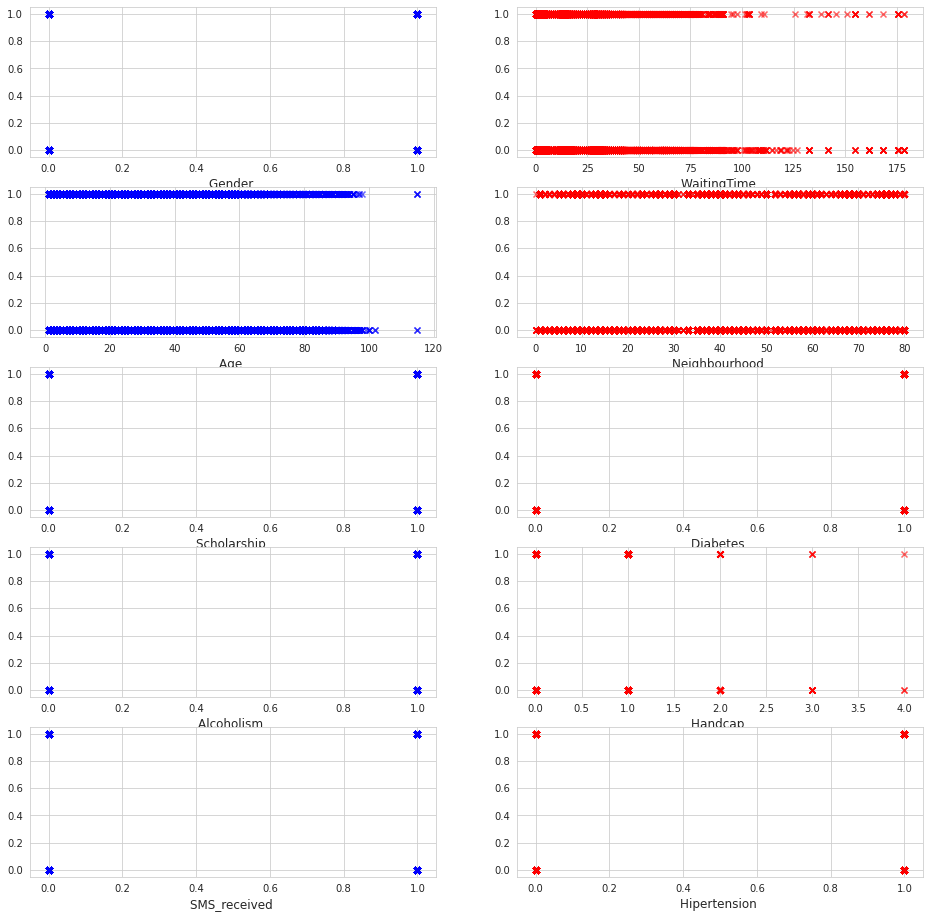

In [79]:
# Using scatter plot, plot all variables prior to the standardization
# We see that the X-axis are different for variables such as Age, neighborhood etc.

plt.rcParams['figure.figsize'] = (16, 16)
plt.subplot(5, 2, 1)
x=df['Gender']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Gender ', fontsize = 12)

plt.subplot(5, 2, 2)
x=df['WaitingTime']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('WaitingTime ', fontsize = 12)

plt.subplot(5, 2, 3)
x=df['Age']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Age ', fontsize = 12)

plt.subplot(5, 2, 4)
x=df['Neighbourhood']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Neighbourhood ', fontsize = 12)

plt.subplot(5, 2, 5)
x=df['Scholarship']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Scholarship ', fontsize = 12)

plt.subplot(5, 2, 6)
x=df['Diabetes']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Diabetes ', fontsize = 12)

plt.subplot(5, 2, 7)
x=df['Alcoholism']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Alcoholism ', fontsize = 12)

plt.subplot(5, 2, 8)
x=df['Handcap']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Handcap ', fontsize = 12)

plt.subplot(5, 2, 9)
x=df['SMS_received']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('SMS_received ', fontsize = 12)

plt.subplot(5, 2, 10)
x=df['Hipertension']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Hipertension ', fontsize = 12)

In [80]:
# Use quantiles to scale.
# Now, the min and maximum are between 0 and 1 on both axis for all variables.
# columns_to_standardize are the x variables we want to standardize
#columns_to_standardize = ['Gender','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
columns_to_standardize = ['WaitingTime','Age']
df[columns_to_standardize] = QuantileTransformer().fit_transform(df[columns_to_standardize])


Text(0.5, 0, 'Hipertension ')

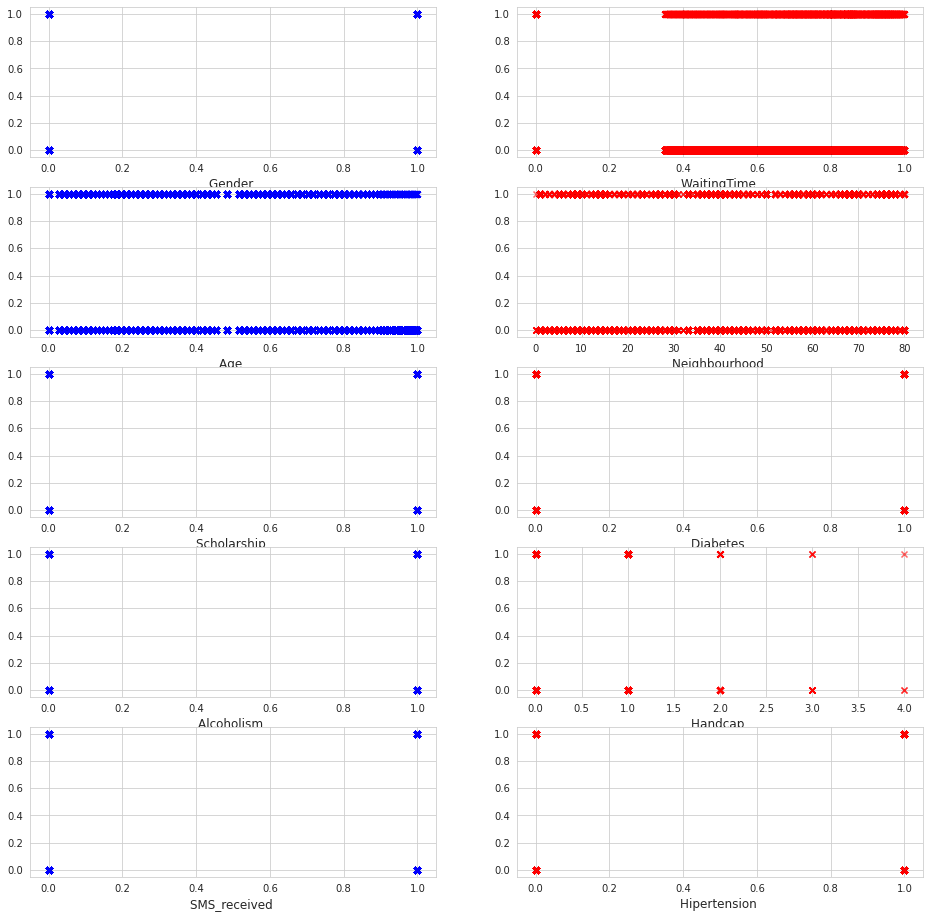

In [81]:
# Use scatter plots again after qualtile standardization.
# Now, all of them are in the same range for the X-Axis.
# Quantile standardization also took care of the outliers

plt.rcParams['figure.figsize'] = (16, 16)
plt.subplot(5, 2, 1)
x=df['Gender']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Gender ', fontsize = 12)

plt.subplot(5, 2, 2)
x=df['WaitingTime']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('WaitingTime ', fontsize = 12)

plt.subplot(5, 2, 3)
x=df['Age']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Age ', fontsize = 12)

plt.subplot(5, 2, 4)
x=df['Neighbourhood']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Neighbourhood ', fontsize = 12)

plt.subplot(5, 2, 5)
x=df['Scholarship']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Scholarship ', fontsize = 12)

plt.subplot(5, 2, 6)
x=df['Diabetes']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Diabetes ', fontsize = 12)

plt.subplot(5, 2, 7)
x=df['Alcoholism']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('Alcoholism ', fontsize = 12)

plt.subplot(5, 2, 8)
x=df['Handcap']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Handcap ', fontsize = 12)

plt.subplot(5, 2, 9)
x=df['SMS_received']
y=df['NoShow']
plt.scatter(x,y,color='b',marker='x',alpha=0.6)
plt.xlabel('SMS_received ', fontsize = 12)

plt.subplot(5, 2, 10)
x=df['Hipertension']
y=df['NoShow']
plt.scatter(x,y,color='r',marker='x',alpha=0.6)
plt.xlabel('Hipertension ', fontsize = 12)

Text(0.5, 0, 'SMS_received ')

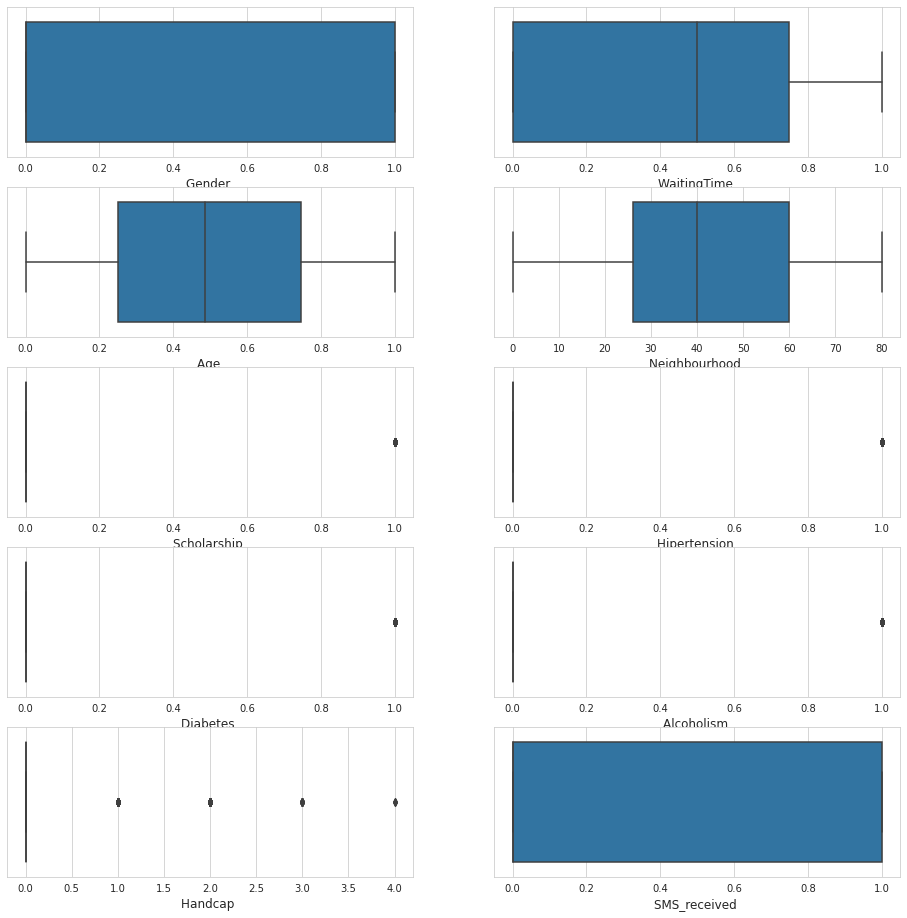

In [82]:
#columns_to_standardize = ['Gender','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')
plt.subplot(5,2,1)
sns.boxplot(x=df['Gender'],data=df)
plt.xlabel('Gender ', fontsize = 12)
plt.subplot(5,2,2)
sns.boxplot(x=df['WaitingTime'],data=df)
plt.xlabel('WaitingTime ', fontsize = 12)
plt.subplot(5,2,3)
sns.boxplot(x=df['Age'],data=df)
plt.xlabel('Age ', fontsize = 12)
plt.subplot(5,2,4)
sns.boxplot(x=df['Neighbourhood'],data=df)
plt.xlabel('Neighbourhood ', fontsize = 12)
plt.subplot(5,2,5)
sns.boxplot(x=df['Scholarship'],data=df)
plt.xlabel('Scholarship ', fontsize = 12)
plt.subplot(5,2,6)
sns.boxplot(x=df['Hipertension'],data=df)
plt.xlabel('Hipertension ', fontsize = 12)
plt.subplot(5,2,7)
sns.boxplot(x=df['Diabetes'],data=df)
plt.xlabel('Diabetes ', fontsize = 12)
plt.subplot(5,2,8)
sns.boxplot(x=df['Alcoholism'],data=df)
plt.xlabel('Alcoholism ', fontsize = 12)
plt.subplot(5,2,9)
sns.boxplot(x=df['Handcap'],data=df)
plt.xlabel('Handcap ', fontsize = 12)
plt.subplot(5,2,10)
sns.boxplot(x=df['SMS_received'],data=df)
plt.xlabel('SMS_received ', fontsize = 12)

In [83]:
df.describe()

,PatientId,AppointmentID,Gender,WaitingTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.350026,0.439312,0.500037,41.737121,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,0.476980,0.355478,0.289136,22.361668,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,0.000000,0.249249,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,0.000000,0.500686,0.484985,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,1.000000,0.750066,0.745245,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [84]:
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [85]:
df

,Gender,WaitingTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,0,0.000000,0.839339,39,0,1,0,0,0,0,0
1,1,0.000000,0.758759,39,0,0,0,0,0,0,0
2,0,0.000000,0.839339,45,0,0,0,0,0,0,0
3,0,0.000000,0.107107,54,0,0,0,0,0,0,0
4,0,0.000000,0.758759,39,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0.936990,0.758759,43,0,0,0,0,0,1,0
110523,0,0.938955,0.687187,43,0,0,0,0,0,1,0
110524,0,0.953847,0.262262,43,0,0,0,0,0,1,0
110525,0,0.953901,0.515516,43,0,0,0,0,0,1,0


**Conduct variability comparison between features using a correlation matrix & drop correlated features**

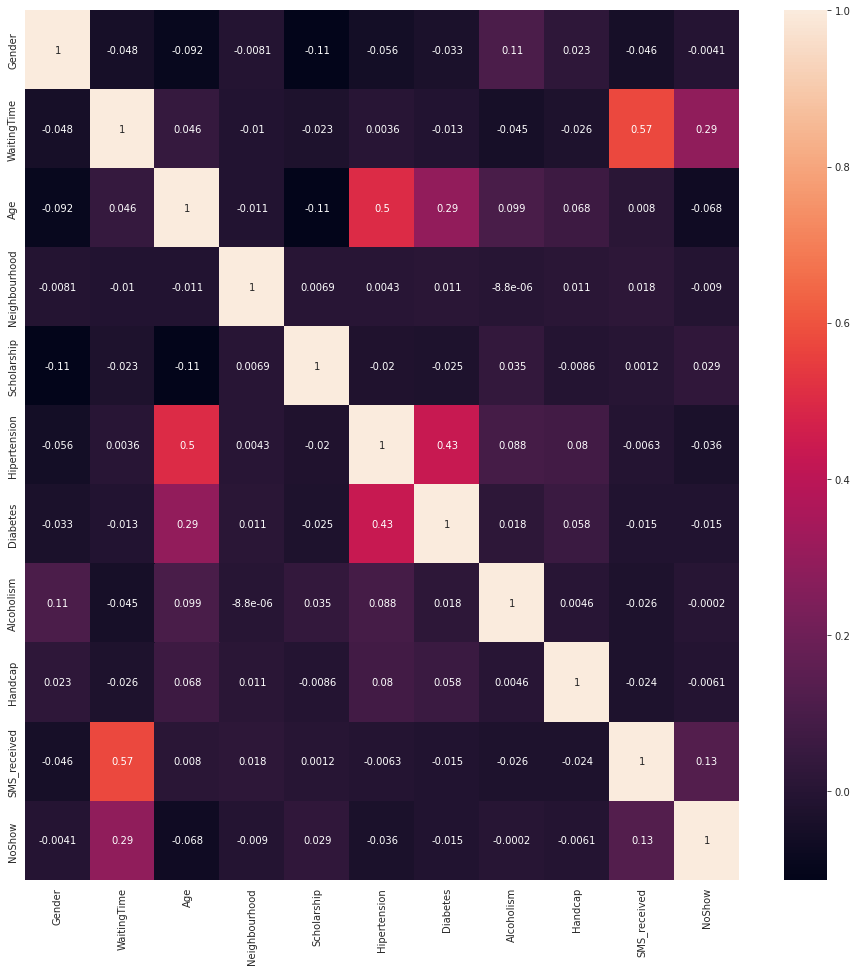

In [89]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [ ]:
#sns.countplot('No-show',data=df)
#histogram for each feature. Look at the age histogram.
#df.hist(bins=10,figsize=(10,10))
#plt.show()

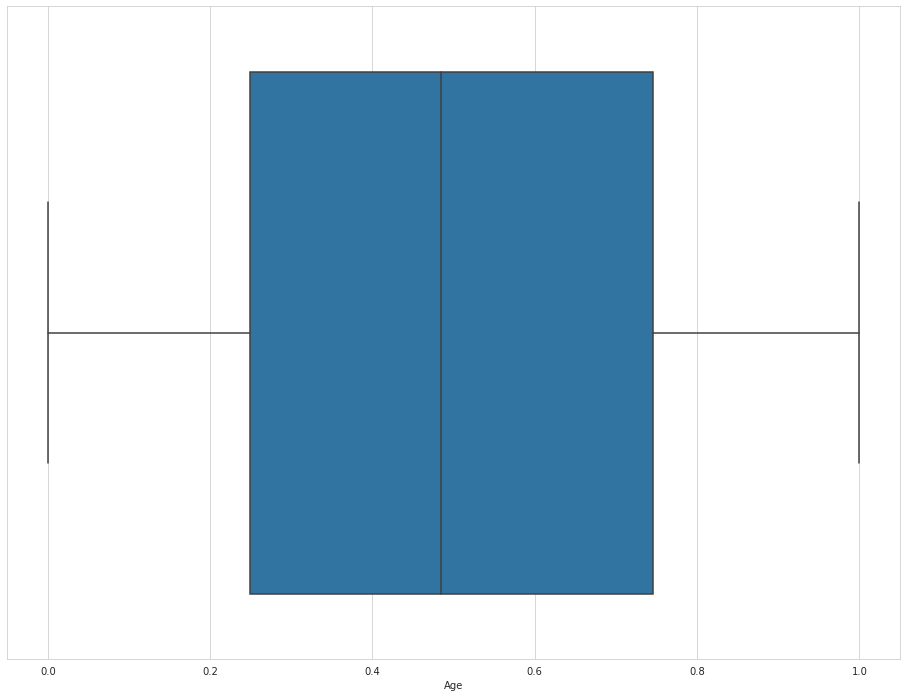

In [88]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(1,1,1)
sns.boxplot(x='Age',data=df)

In [ ]:
# Normalization 
# The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
#columns_to_standardize = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']
#columns_to_standardize = ['Age']
#df[columns_to_standardize] = MinMaxScaler().fit_transform(df[columns_to_standardize])

In [ ]:
# Standardization 
# Normalization shrinks the distribution of data and the maximum value becomes 1. So normalization may not be good if the data is very spreadout. 
# With standardization, the outliers are preserved after standardization. Distribution won't be narrow after standardization.
# Standardization works on the entire axis and doesn't shrink between 0 and 1.
#columns_to_standardize = ['Age','Neighbourhood']
#df[columns_to_standardize] = StandardScaler().fit_transform(df[columns_to_standardize])

In [ ]:
#plt.figure(figsize=(16,12))
#sns.set_style(style='whitegrid')
#plt.subplot(1,1,1)
#sns.boxplot(x='Age',data=df)